In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2005-present/World Happiness Report.csv


In [2]:
import plotly.express as px
import plotly.offline as py

In [3]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2005-present/World Happiness Report.csv')
df.head(2)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [5]:
df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [6]:
df =df.rename(columns={'Regional Indicator':'Region'})
df.head(1)

,Country Name,Region,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.72359,7.350416,0.450662,50.5,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072


In [7]:
df.isna().sum()

Country Name                           0
Region                               112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.fillna(axis=0 , method='ffill')

In [10]:
df.isna().sum()

Country Name                         0
Region                               0
Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
dtype: int64

Data Cleaned, No Nul value, No duplicates. Data Prepared!

**Feature Understanding their distribution, Outliers etc**

Text(0, 0.5, 'Counts')

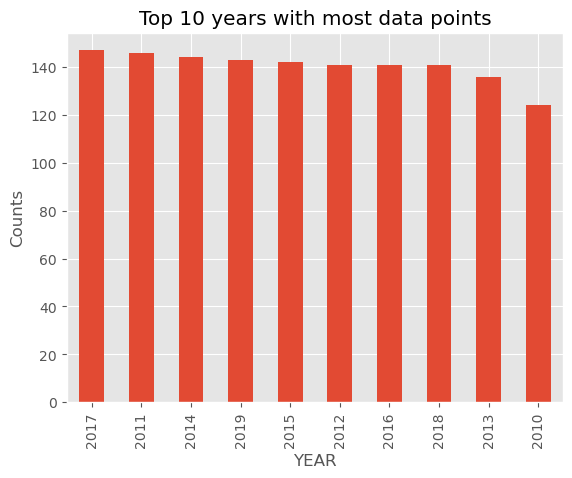

In [11]:
ax = df['Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 years with most data points')
ax.set_xlabel('YEAR')
ax.set_ylabel('Counts')

**Feature engineering**

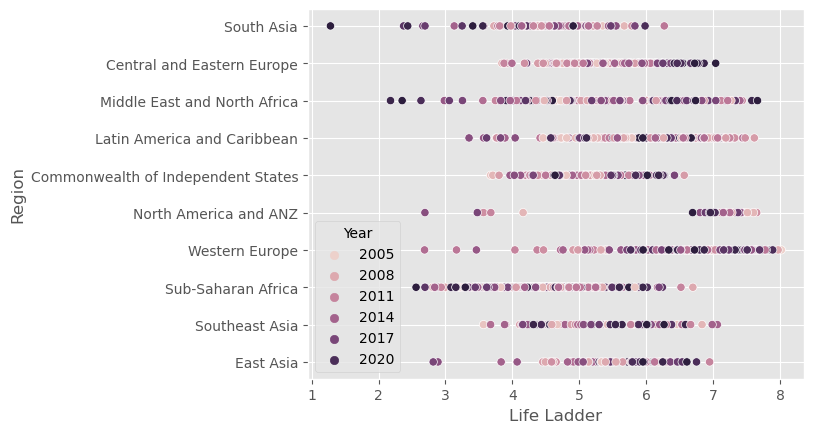

In [12]:
sns.scatterplot(x='Life Ladder', y='Region',
       hue='Year',
       data=df)
plt.show()

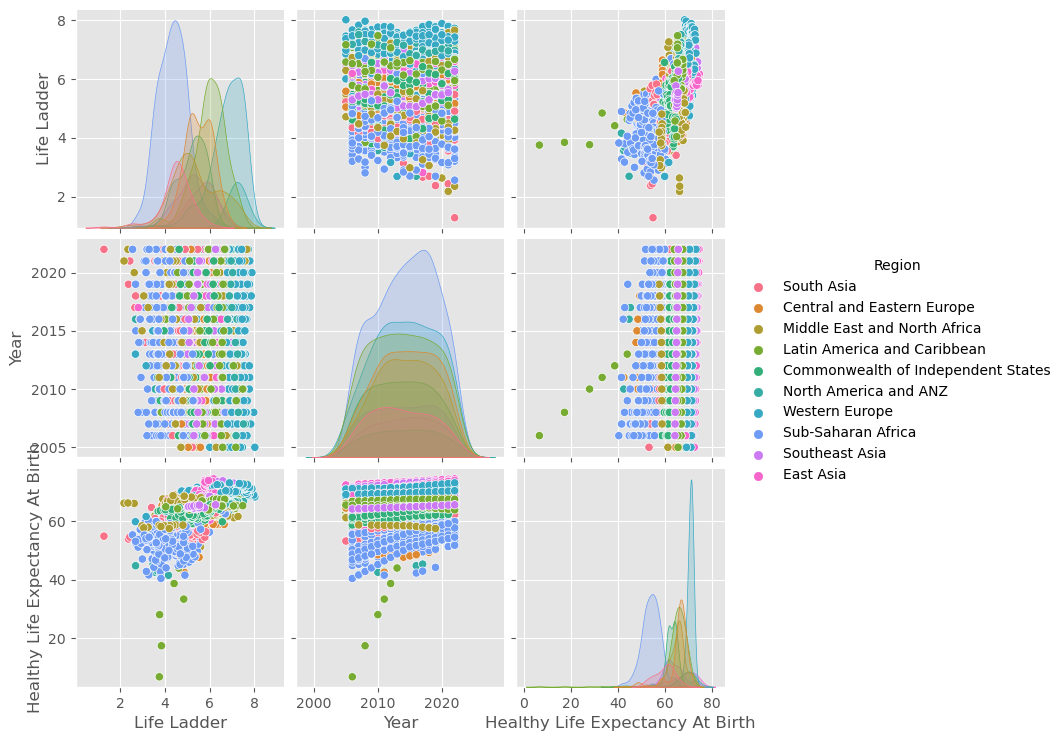

In [13]:
sns.pairplot(df, vars=['Life Ladder', 'Year', 'Healthy Life Expectancy At Birth'], hue='Region')
plt.show()

In [14]:
fig = px.choropleth(df.sort_values("Year"), 
                    locations = "Country Name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    template = "plotly_dark",
                     color_continuous_scale= 'YlOrBr',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

**Which Factors depend on Country’s Happiness?**

/tmp/ipykernel_20/2447784214.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



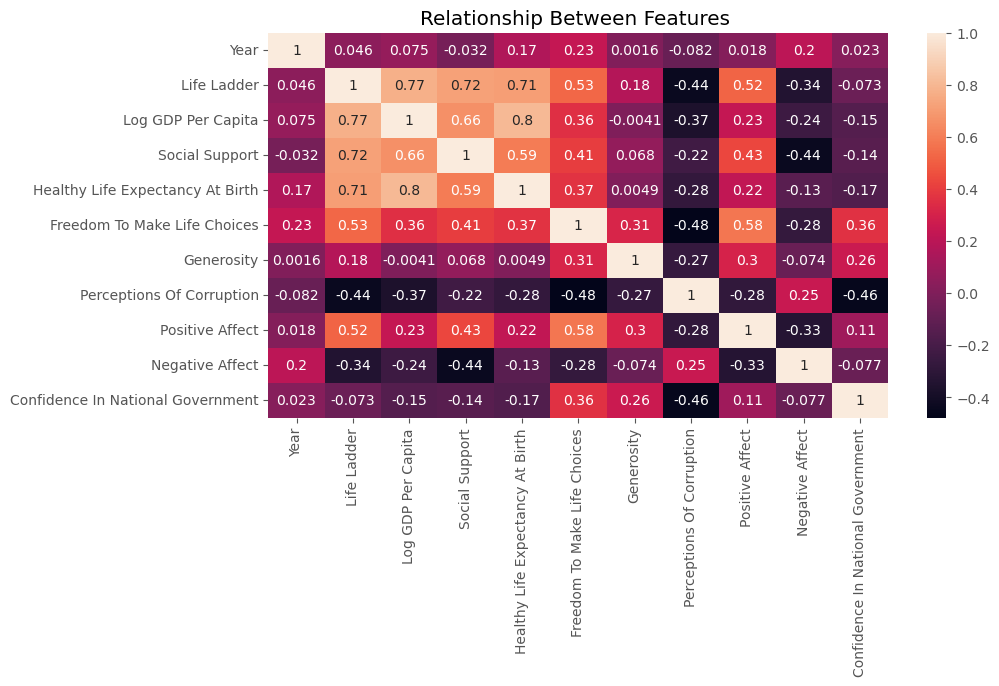

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot = True,ax=ax )
plt.title("Relationship Between Features ")
plt.show()

<Axes: xlabel='Life Ladder', ylabel='Generosity'>

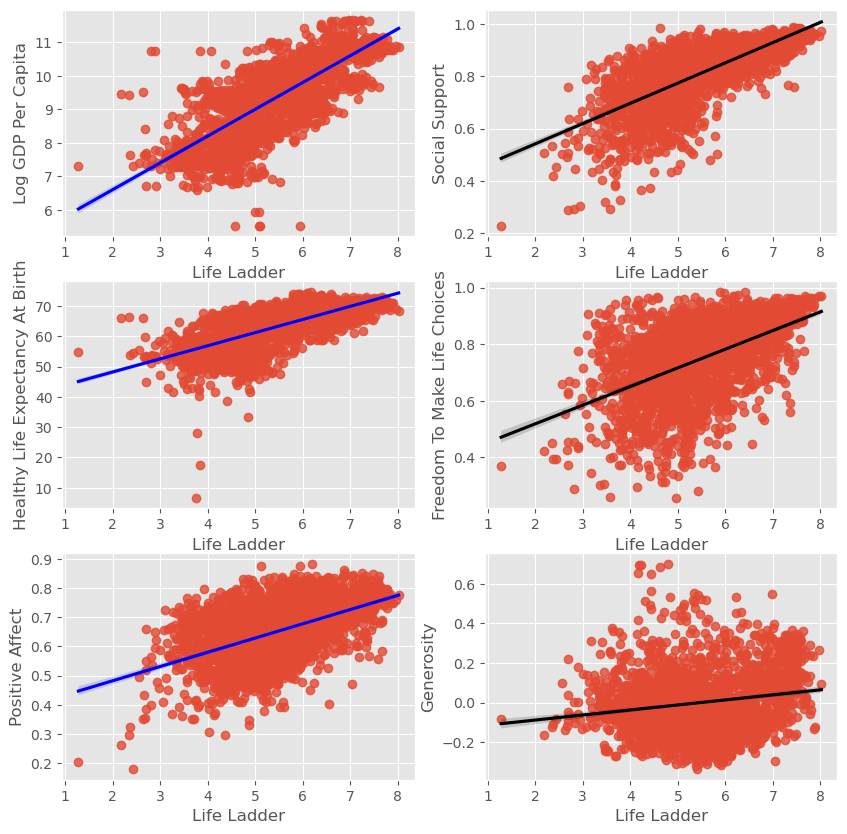

In [16]:
fig, axes = plt.subplots(3,2,figsize=(10, 10))

sns.regplot(ax =axes[0,0],data =df, x = 'Life Ladder', y='Log GDP Per Capita',line_kws={"color": "blue"} )

sns.regplot(ax =axes[0,1],data =df, x = 'Life Ladder', y='Social Support',line_kws={"color": "black"} )

sns.regplot(ax =axes[1,0],data =df, x = 'Life Ladder', y='Healthy Life Expectancy At Birth',line_kws={"color": "blue"} )

sns.regplot(ax =axes[1,1],data =df, x = 'Life Ladder', y='Freedom To Make Life Choices',line_kws={"color": "black"} )

sns.regplot(ax =axes[2,0],data =df, x = 'Life Ladder', y='Positive Affect',line_kws={"color": "blue"} )

sns.regplot(ax =axes[2,1],data =df, x = 'Life Ladder', y='Generosity',line_kws={"color": "black"} )

In [17]:
features=list(['Life Ladder','Log GDP Per Capita','Social Support','Healthy Life Expectancy At Birth','Freedom To Make Life Choices','Positive Affect','Generosity'])
corr = df[features].corr()

Text(0.5, 1.0, 'Correlation With Happines')

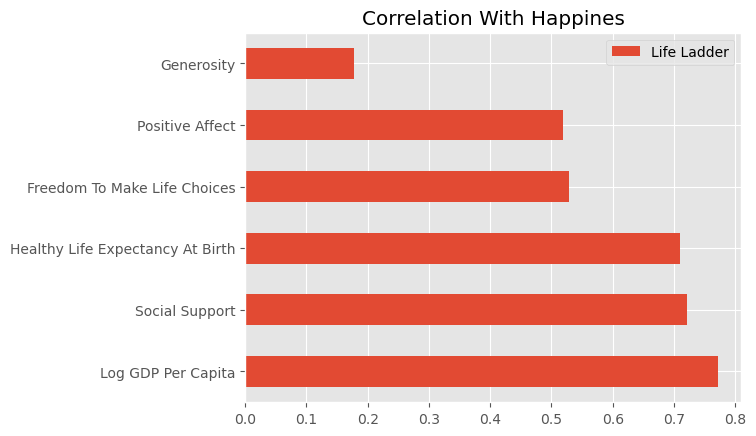

In [18]:
axes = corr.iloc[1:,0:1].plot(kind = 'barh')
axes.set_title("Correlation With Happines")

**10 Happiest countries**

In [19]:
top_happy = df[(df['Year'] == 2022)]
data = top_happy.groupby('Country Name')['Life Ladder'].mean().round(2).nlargest(10).reset_index()

[Text(0, 0, '7.73'),
 Text(0, 0, '7.66'),
 Text(0, 0, '7.54'),
 Text(0, 0, '7.45'),
 Text(0, 0, '7.43'),
 Text(0, 0, '7.39'),
 Text(0, 0, '7.29'),
 Text(0, 0, '7.23'),
 Text(0, 0, '7.08'),
 Text(0, 0, '7.04')]

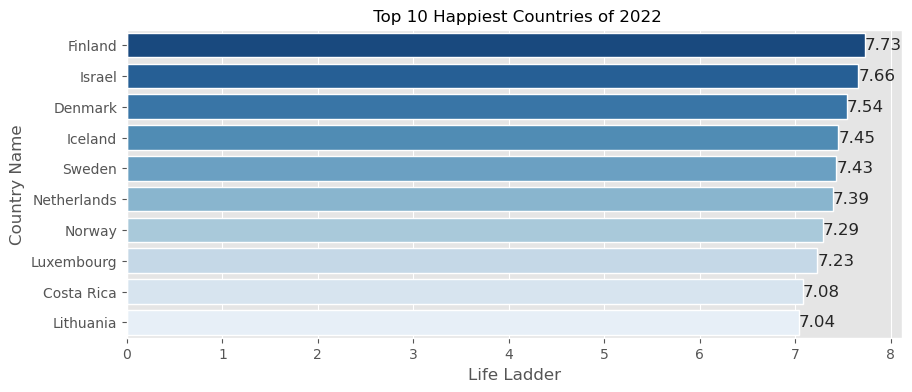

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("Blues",n_colors=10)
palette.reverse()
sns.barplot(ax =ax,data = data , x = data['Life Ladder'], y = data['Country Name'],palette = palette)
ax.set_title(' Top 10 Happiest Countries of 2022')
ax.bar_label(ax.containers[0])

**Top 10 Corrupt countries**

In [21]:
top_corrupt = df[(df['Year'] == 2022)]
data = top_corrupt.groupby('Country Name')['Perceptions Of Corruption'].mean().nlargest(10).reset_index()

[Text(0, 0, '94'),
 Text(0, 0, '94'),
 Text(0, 0, '94'),
 Text(0, 0, '91'),
 Text(0, 0, '91'),
 Text(0, 0, '91'),
 Text(0, 0, '89'),
 Text(0, 0, '89'),
 Text(0, 0, '89'),
 Text(0, 0, '88')]

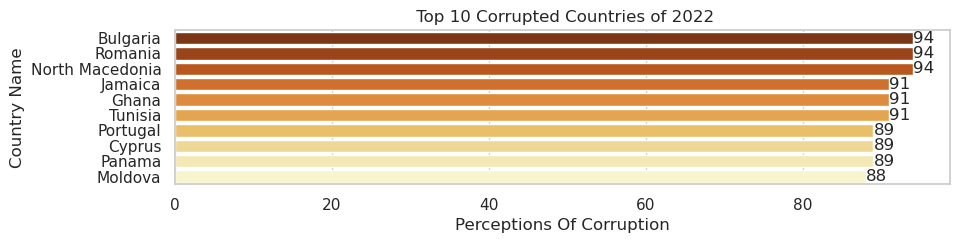

In [22]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("YlOrBr",n_colors=10)
palette.reverse()
sns.barplot(ax =ax,data = data , x = data['Perceptions Of Corruption'].round(2)*100, y = data['Country Name'],palette = palette)
ax.set_title(' Top 10 Corrupted Countries of 2022')
ax.bar_label(ax.containers[0])

*This was an exploratory data analysis about why some countries are considered “happier” than others. We found that GDP per capita & Social Support are the most important factor, which would make sense because money allows countries to afford luxuries along with basic resources.*